---
INSTALACJE
---
Uruchamiamy tylko raz

---

In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install "https://github.com/explosion/spacy-models/releases/download/pl_core_news_lg-3.4.0/pl_core_news_lg-3.4.0.tar.gz"

  Created wheel for pl-core-news-lg: filename=pl_core_news_lg-3.4.0-py3-none-any.whl size=573594374 sha256=dca35b77fc2bf3915485385c85f9519e9babed556d099df0d16f9ca64f2ecc80
  Stored in directory: c:\users\1boze\appdata\local\pip\cache\wheels\1a\e6\99\d8aa2394cd5931017ae133d0e4dfb392a7434904d791d4902e
Successfully built pl-core-news-lg
  Attempting uninstall: pl-core-news-lg
    Found existing installation: pl-core-news-lg 3.4.0
    Uninstalling pl-core-news-lg-3.4.0:
      Successfully uninstalled pl-core-news-lg-3.4.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install scikit-learn

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0rc0 requires numpy~=1.19.2, but you have numpy 1.22.4 which is incompatible.
tensorflow 2.5.0rc0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.
You should consider upgrading via the 'c:\Users\1boze\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


---
KOD
---

---

In [10]:
import spacy
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
from collections import OrderedDict

In [11]:
nlp = spacy.load("pl_core_news_lg")

In [12]:
df =pd.read_csv("data/processed_dataset_12_11_2021.csv")

---
**ANALIZOWANIE CZĘŚCI MOWY**

---

Poniżej funkcja zwracająca słownik dla jednego tekstu przeanalizowanego przez *pl_core_news_lg*
Struktura zwracanego słownika wygląda następująco:
```python
{
  "CZĘŚĆ_MOWY": [("NAJPOPULARNIEJSZE SŁOWO": 200), ..., ("NAJMNIEJ POPULARNE SŁOWO" : 1)],
  # ...
}
```

In [28]:
def getMostPopularSpeechParts(providedDoc):
  acceptedSpeechParts = ['NOUN', 'VERB','ADJ','PROPN']
  speechParts = OrderedDict()
  mostPopularSpeechParts = OrderedDict()
  tupledMostPopularSpeechParts = OrderedDict()
  for token in providedDoc:
    if token.pos_ in acceptedSpeechParts:
      speechPartList = []
      if token.pos_ in speechParts.keys():
        if speechParts[token.pos_] is None:
          speechParts[token.pos_] = []
        speechPartList.extend(speechParts[token.pos_])
      speechPartList.append(token.text)
      speechParts[token.pos_] = speechPartList

  for index, item in enumerate(speechParts.values()):
    speechPartName = list(speechParts.keys())[index]
    if len(item) > 1:
      counted_dict = dict((i, item.count(i)) for i in item)
      counted_list = [(k, v) for k, v in counted_dict.items()]
      counted_list.sort(key=lambda y: y[1],reverse=True)
      mostPopularSpeechParts[speechPartName] = [k for (k,v) in counted_list]
      tupledMostPopularSpeechParts[speechPartName] = counted_list
  return (mostPopularSpeechParts,tupledMostPopularSpeechParts)

In [43]:
def saveMostPopularWordsWithoutSpeechPartDistinction(dictionary):
    result = OrderedDict()
    for legalAffair in dictionary:
        mergedDictionary = []
        for speechPart in dictionary[legalAffair]:
            mergedDictionary.extend(dictionary[legalAffair][speechPart])
        mergedDictionary.sort(key= lambda x: x[1],reverse=True)
        result[legalAffair] = {'words': mergedDictionary}
    dataFrame = pd.DataFrame(result)
    dataFrame.to_csv("data/result.csv")

In [44]:
categories = OrderedDict()

result = OrderedDict()
tupledResult = OrderedDict()

for i in range(len(df)):
  if not df['label_high'][i] in categories:
    categories[df['label_high'][i]]=''

  categories[df['label_high'][i]] =str(categories[df['label_high'][i]])+" "+str(df['text_full'][i])

for i in categories:
  # analise the text with pl_core_news_lg package
  analisedText = nlp(categories[i].replace("  "," "))
  # get most popular parts of speech from the document
  doc = getMostPopularSpeechParts(analisedText)[0]
  tupledDoc = getMostPopularSpeechParts(analisedText)[1]
  # save most popular speech parts to the dictionary
  result[i] = doc
  tupledResult[i] = tupledDoc
saveMostPopularWordsWithoutSpeechPartDistinction(tupledResult)

# create a dataframe
dataFrame = pd.DataFrame(result)
# save data to csv
dataFrame.to_csv("data/most_popular_words.csv")

In [45]:
noSpeechPartsDistinction = data = pd.read_csv("data/result.csv")
noSpeechPartsDistinction

,Unnamed: 0,prawo cywilne,prawo administracyjne,prawo farmaceutyczne,prawo pracy,prawo medyczne,prawo karne,prawo miädzynarodowe,prawo podatkowe,prawo konstytucyjne,odpowiedzi niestandardowe,tu interpolska
0,words,"[('może', 241), ('klient', 118), ('klientka', ...","[('może', 127), ('klient', 67), ('klientka', 5...","[('może', 137), ('klientka', 64), ('apteki', 6...","[('może', 284), ('pracy', 216), ('pracodawca',...","[('może', 470), ('klientka', 293), ('klient', ...","[('może', 125), ('klientka', 75), ('klient', 4...","[('może', 9), ('klient', 5), ('musi', 5), ('kl...","[('klientka', 27), ('klient', 18), ('może', 17...","[('klient', 2), ('przepisy', 2), ('konstytucją...","[('klientka', 21), ('umowy', 14), ('może', 10)...","[('klienta', 4), ('obejmuje', 3), ('oddziale',..."


In [26]:
data = pd.read_csv("data/most_popular_words.csv")
data

,Unnamed: 0,prawo cywilne,prawo administracyjne,prawo farmaceutyczne,prawo pracy,prawo medyczne,prawo karne,prawo miädzynarodowe,prawo podatkowe,prawo konstytucyjne,odpowiedzi niestandardowe,tu interpolska
0,NOUN,"[('klient', 118), ('klientka', 110), ('sposób'...","[('klient', 67), ('klientka', 59), ('danych', ...","[('klientka', 64), ('apteki', 60), ('apteka', ...","[('pracy', 216), ('pracodawca', 194), ('pracę'...","[('klientka', 293), ('klient', 199), ('pracy',...","[('klientka', 75), ('klient', 42), ('prawa', 4...","[('klient', 5), ('klientka', 4), ('diety', 4),...","[('klientka', 27), ('klient', 18), ('kasy', 14...","[('klient', 2), ('przepisy', 2), ('konstytucją...","[('klientka', 21), ('umowy', 14), ('klientkę',...","[('klienta', 4), ('oddziale', 2), ('polisa', 2..."
1,ADJ,"[('mieszkaniowej', 57), ('mieszkaniowa', 34), ...","[('osobowych', 32), ('przedmiotowej', 15), ('m...","[('leczniczy', 11), ('szpitalnej', 10), ('apte...","[('wypoczynkowego', 29), ('innym', 18), ('zobo...","[('medycznej', 39), ('covidowego', 35), ('medy...","[('prawne', 16), ('przedmiotowej', 13), ('zawo...","[('europejskiej', 4), ('polskiej', 2), ('wielk...","[('fiskalnej', 14), ('fiskalną', 4), ('gospoda...","[('zgodne', 2), ('wezwana', 1), ('zwolniona', ...","[('przedmiotowej', 4), ('przesłana', 3), ('zgo...","[('ewentualne', 1), ('medyczne', 1), ('popełni..."
2,VERB,"[('może', 241), ('należy', 56), ('powinna', 40...","[('może', 127), ('ma', 25), ('zrobić', 21), ('...","[('może', 137), ('musi', 24), ('powinna', 21),...","[('może', 284), ('ma', 48), ('zobowiązać', 29)...","[('może', 470), ('ma', 86), ('powinien', 74), ...","[('może', 125), ('ma', 24), ('zrobić', 19), ('...","[('może', 9), ('musi', 5), ('udzielać', 2), ('...","[('może', 17), ('ma', 13), ('powinna', 12), ('...","[('wyjść', 2), ('wolno', 1), ('może', 1), ('po...","[('może', 10), ('powinna', 6), ('ma', 5), ('mó...","[('obejmuje', 3), ('szkoda', 1), ('posiada', 1)]"
3,PROPN,"[('internet', 2), ('oc', 2), ('vat', 2), ('mic...","[('panipana', 6), ('ue', 3), ('rodo', 2), ('va...","[('auctore', 6), ('nip', 3), ('polsce', 3), ('...","[('nova', 2), ('med', 2), ('koronawirusa', 1),...","[('sor', 17), ('koronawirusa', 11), ('vat', 4)...","[('sor', 2), ('warszawie', 2), ('vat', 2), ('p...","[('polsce', 2), ('windows', 1), ('brytanii', 1)]","[('vat', 15), ('pkd', 2), ('nip', 1), ('zus', ...",NaN,"[('oc', 2), ('google', 1), ('krszr', 1), ('msi...",NaN


---
**SIECI SAMOORGANIZUJĄCE SIĘ**


---

https://rubikscode.net/2021/07/06/implementing-self-organizing-maps-with-python-and-tensorflow/

https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/

In [16]:
def remove_common(a, b):
    a, b = list(set(a) - set(b)),list(set(b) - set(a))
    return (a,b)

def getUniqueDictionary(dictionary):
    speechParts = ['NOUN', 'VERB','ADJ','PROPN']
    uniqueDictionary = OrderedDict()
    for part in speechParts:
        for category in dictionary:
            part1 = dictionary[category]
            for category2 in dictionary:
                part2 = dictionary[category2]
                if category is not category2:
                    if category in uniqueDictionary:
                        part1 = uniqueDictionary[category]
                    if category2 in uniqueDictionary:
                        part2 = uniqueDictionary[category2]
                    if part not in part1.keys():
                        part1[part] = []
                    if part not in part2.keys():
                        part2[part] = []
                    uList1, uList2 = remove_common(part1[part],part2[part])
                    part1[part] = uList1
                    part2[part] = uList2
                    uniqueDictionary[category] = part1
                    uniqueDictionary[category2] = part2
    return uniqueDictionary

def countUniqueWords(dictionary):
    countedDictionary = []
    for part in dictionary:
        values = []
        for words in dictionary[part].values():
            values.append(len(words))
        countedDictionary.append(values)
    return countedDictionary

def reverseDictionary(dictionary):
    speechParts = ['NOUN', 'VERB','ADJ','PROPN']
    reversedDictionary = OrderedDict()
    for part in speechParts:
        partDictionary = OrderedDict()
        for legalAffairs in dictionary:
            parts = dictionary[legalAffairs]
            partDictionary[legalAffairs] = parts[part]
        reversedDictionary[part] = partDictionary
    return reversedDictionary



In [17]:
from sklearn.preprocessing import scale
from minisom import MiniSom
import numpy as np

uniqueDictionary = getUniqueDictionary(result)
reversedDictionary = reverseDictionary(uniqueDictionary)
countedUniqueWords = countUniqueWords(reversedDictionary)

legalAffairs = ['prawo cywilne', 'prawo administracyjne', 'prawo farmaceutyczne','prawo pracy', 'prawo medyczne', 'prawo karne','prawo miädzynarodowe','prawo podatkowe','prawo konstytucyjne']
speechParts = ['NOUN', 'VERB','ADJ','PROPN']

X = scale(countedUniqueWords)
size = 20
som = MiniSom(size, size, len(X[0]),neighborhood_function='gaussian', sigma=1.5,random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 3.2794612721480075e-10


c:\Users\1boze\AppData\Local\Programs\Python\Python39\lib\site-packages\minisom.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]
c:\Users\1boze\AppData\Local\Programs\Python\Python39\lib\site-packages\minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


In [18]:
uniqueFrame = pd.DataFrame(uniqueDictionary)
uniqueFrame.to_csv("data/unique_words_by_legal_affairs.csv")
reversedUniqueFrame = pd.DataFrame(reversedDictionary)
reversedUniqueFrame.to_csv("data/unique_words_by_speech_parts.csv")

---
**UNIQUE WORDS BY LEGAL AFFAIRS**

---

In [19]:
uniqueFrame

,prawo cywilne,prawo administracyjne,prawo farmaceutyczne,prawo pracy,prawo medyczne,prawo karne,prawo miädzynarodowe,prawo podatkowe,prawo konstytucyjne,odpowiedzi niestandardowe,tu interpolska
NOUN,"[córkę, wnuczki, operacją, apelację, wierzytel...","[otwierania, powierzeniu, niesegregowanie, słu...","[farmacja, opakowaniach, wstrzymanie, dawce, w...","[wzrok, absencji, szafki, dzieło, świadczeniu,...","[temperatury, specjalizacja, opisu, nos, nieza...","[celpodmiot, pacjentkę, groźba, siłą, rehabili...","[towar, cpnp, obowiązki, kątem, odkupienie, pr...","[alkoholu, urząd, celu, najem, wysokości, zast...","[lekarz, kwarantannę, rowerami, przepisy, rowe...","[aneksem, punkcie, stron, porządkiem, odpowied...","[samochodzie, ubezpieczonego, szyby, postaci, ..."
ADJ,"[ubezpieczeniowy, teściowej, uzyskaną, eksploa...","[krótkim, demonstracyjnego, przeznaczonej, jak...","[największych, papierowe, przeterminowanych, z...","[wynoszącej, wykonującemu, stosowany, uprzedni...","[okazjonalnym, świątecznej, światowymi, przecz...","[zaistniałym, kapitałowe, przygotowawczym, dan...","[importowany, umiejscowiona, wchodzącymi, dopu...","[zobowiązany, pobierane, pogrzebowy, prowadzon...","[wprowadzające, zwolniona]","[zakupywanej, polskim, wypełniony, zaplanowaną...","[wykupioną, ewentualne, plastycznej, wykupiony..."
VERB,"[powziąć, zaadaptować, orzekł, wyprowadzić, pr...","[prosperuje, nakazują, mogliby, rodzi, wybudow...","[rozpuścić, przepakować, wypracowywać, napisać...","[uwzględniać, stało, uprzedzić, spowodować, za...","[nadzorować, odpowiadać, zdecydują, potrącać, ...","[utrudnia, używać, przedstawiając, stawi, dotr...","[zaprzestał, reguluje, wykupił, wypłacało, nal...","[zapewniały, należy, obowiązują, wpłacić, zako...","[pojeździć, wyjść, pobiegać, wolno]","[nałożyć, otrzymać, tytułem, uzyskać, nałożył,...","[posiada, obejmuje, szkoda]"
PROPN,"[nan, xx, wynajmującego, ac, kupującego, spadk...","[marszałkowski, panipana, pesel, bik, rodo, lu...","[nowejapteki, krakowie, otc, tetra, vitro, ips...","[pharmacovigilance, rp, med, crt, zrezygnowani...","[hiv, usg, szczepionkobusie, ekg, specjalizacj...","[ponosiłby, nieprawdy, warszawie, sor]","[polsce, windows, brytanii]","[usa, rż]",[],"[msigm, krszr, google]",[]


---
**UNIQUE WORDS BY SPEECH PARTS**

---

In [20]:
reversedUniqueFrame

,NOUN,VERB,ADJ,PROPN
prawo cywilne,"[córkę, wnuczki, operacją, apelację, wierzytel...","[powziąć, zaadaptować, orzekł, wyprowadzić, pr...","[ubezpieczeniowy, teściowej, uzyskaną, eksploa...","[nan, xx, wynajmującego, ac, kupującego, spadk..."
prawo administracyjne,"[otwierania, powierzeniu, niesegregowanie, słu...","[prosperuje, nakazują, mogliby, rodzi, wybudow...","[krótkim, demonstracyjnego, przeznaczonej, jak...","[marszałkowski, panipana, pesel, bik, rodo, lu..."
prawo farmaceutyczne,"[farmacja, opakowaniach, wstrzymanie, dawce, w...","[rozpuścić, przepakować, wypracowywać, napisać...","[największych, papierowe, przeterminowanych, z...","[nowejapteki, krakowie, otc, tetra, vitro, ips..."
prawo pracy,"[wzrok, absencji, szafki, dzieło, świadczeniu,...","[uwzględniać, stało, uprzedzić, spowodować, za...","[wynoszącej, wykonującemu, stosowany, uprzedni...","[pharmacovigilance, rp, med, crt, zrezygnowani..."
prawo medyczne,"[temperatury, specjalizacja, opisu, nos, nieza...","[nadzorować, odpowiadać, zdecydują, potrącać, ...","[okazjonalnym, świątecznej, światowymi, przecz...","[hiv, usg, szczepionkobusie, ekg, specjalizacj..."
prawo karne,"[celpodmiot, pacjentkę, groźba, siłą, rehabili...","[utrudnia, używać, przedstawiając, stawi, dotr...","[zaistniałym, kapitałowe, przygotowawczym, dan...","[ponosiłby, nieprawdy, warszawie, sor]"
prawo miädzynarodowe,"[towar, cpnp, obowiązki, kątem, odkupienie, pr...","[zaprzestał, reguluje, wykupił, wypłacało, nal...","[importowany, umiejscowiona, wchodzącymi, dopu...","[polsce, windows, brytanii]"
prawo podatkowe,"[alkoholu, urząd, celu, najem, wysokości, zast...","[zapewniały, należy, obowiązują, wpłacić, zako...","[zobowiązany, pobierane, pogrzebowy, prowadzon...","[usa, rż]"
prawo konstytucyjne,"[lekarz, kwarantannę, rowerami, przepisy, rowe...","[pojeździć, wyjść, pobiegać, wolno]","[wprowadzające, zwolniona]",[]
odpowiedzi niestandardowe,"[aneksem, punkcie, stron, porządkiem, odpowied...","[nałożyć, otrzymać, tytułem, uzyskać, nałożył,...","[zakupywanej, polskim, wypełniony, zaplanowaną...","[msigm, krszr, google]"


---
**PLOTS**

---

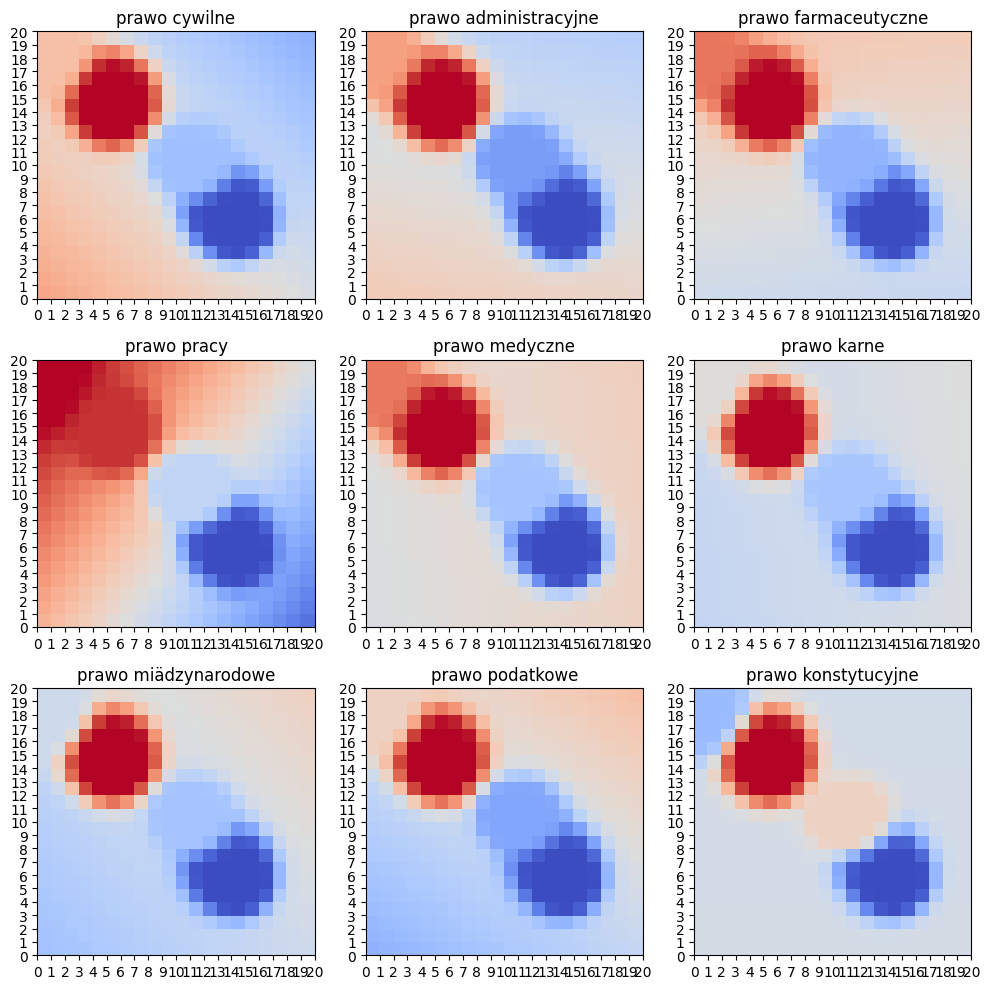

In [21]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(legalAffairs):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()